# 第6章: 音データの加工・可視化を行う10本ノック

## ノック71:音データを再生してみよう

In [1]:
import IPython.display as disp
disp.Audio('100knock-process-visualization/chapter-6/data/音声.mp3')

In [2]:
disp.Audio('100knock-process-visualization/chapter-6/data/携帯電話着信音.mp3')

## ノック72:音データを読み込んでみよう

In [3]:
import librosa

# MP3を認識するためにffmpegが必要
# conda install -c conda-forge ffmpeg

In [4]:
audio1, sr1 = librosa.load('100knock-process-visualization/chapter-6/data/音声.mp3',sr=None)
print(audio1)
print(sr1)

C:\Users\mikam\Anaconda3\envs\100_knocks_2\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[ 0.          0.          0.         ... -0.00418091 -0.00415039
 -0.00402832]
44100


In [5]:
print(audio1.shape)
print(audio1.max())
print(audio1.min())

(46080,)
0.71469116
-0.55914307


In [6]:
audio2, sr2 = librosa.load('100knock-process-visualization/chapter-6/data/携帯電話着信音.mp3',sr=None)
print(audio2)
print(sr2)
print(audio2.shape)

[ 0.          0.          0.         ... -0.00509644 -0.00408936
 -0.00323486]
44100
(101376,)


## ノック73: 音データの一部を取得してみよう

In [7]:
audio2, sr2 = librosa.load('100knock-process-visualization/chapter-6/data/携帯電話着信音.mp3',sr=None, offset=0, duration=1)
print(audio2)
print(sr2)
print(audio2.shape)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 7.3242188e-04
 1.8005371e-03]
44100
(44100,)


In [12]:
disp.Audio(data=audio2, rate=sr2)

In [15]:
audio1, sr1 = librosa.load('100knock-process-visualization/chapter-6/data/音声.mp3',sr=None, offset=0, duration=1)
disp.Audio(data=audio1, rate=sr1)
# print(audio1.shape)

## ノック74:音データのサンプリングレートを変えてみよう

In [16]:
audio1_sr22, sr1_sr22 = librosa.load('100knock-process-visualization/chapter-6/data/音声.mp3',sr=22050, offset=0, duration=1)
print(audio1_sr22)
print(sr1_sr22)
print(audio1_sr22.shape)

[0.         0.         0.         ... 0.00226751 0.00197143 0.00246139]
22050
(22050,)


In [17]:
audio1_sr8 = librosa.resample(audio1, sr1, 8000)
print(audio1_sr8)
print(audio1_sr8.shape)

[0.         0.         0.         ... 0.00221227 0.00206873 0.00232983]
(8000,)


In [18]:
librosa.get_samplerate('100knock-process-visualization/chapter-6/data/音声.mp3')

44100

## ノック75: 音データを可視化してみよう

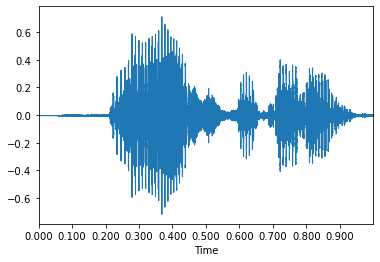

In [19]:
import librosa.display as libdisp
libdisp.waveplot(audio1, sr=sr1)

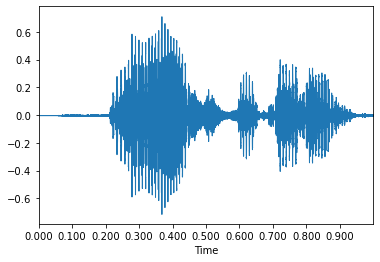

In [20]:
libdisp.waveplot(audio1_sr22, sr=sr1_sr22)

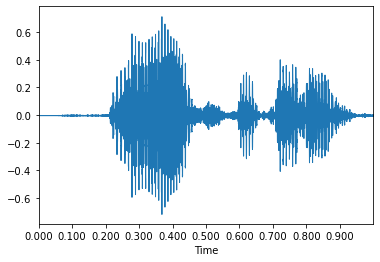

In [22]:
libdisp.waveplot(audio1_sr8, sr=8000)

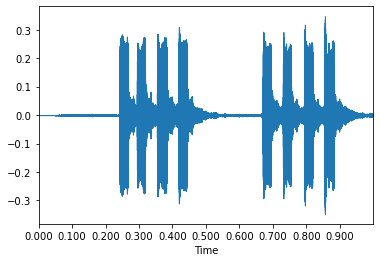

In [23]:
libdisp.waveplot(audio2, sr=sr2)

## ノック76: 音データの大きさを取得してみよう

In [24]:
import numpy as np
audio1_rms = np.sqrt(np.mean(audio1**2))
audio2_rms = np.sqrt(np.mean(audio2**2))
print(audio1_rms)
print(audio2_rms)

0.117136106
0.07960437


In [27]:
rms1 = librosa.feature.rms(y=audio1)
time1 = librosa.times_like(rms1, sr=sr1)
print(rms1.shape)
rms1

(1, 87)


array([[0.00000000e+00, 0.00000000e+00, 3.43852162e-06, 6.14842647e-05,
        3.26260459e-04, 9.28089488e-04, 1.43330824e-03, 2.11764732e-03,
        2.83014285e-03, 2.95364601e-03, 2.78275018e-03, 2.47712759e-03,
        2.14911252e-03, 2.37134076e-03, 2.54098373e-03, 2.70709419e-03,
        2.72369199e-03, 1.75012723e-02, 4.15568538e-02, 6.69913515e-02,
        8.92794728e-02, 1.18810020e-01, 1.51561230e-01, 1.74796045e-01,
        1.94208235e-01, 2.03803048e-01, 2.03455716e-01, 2.08877236e-01,
        2.23945156e-01, 2.33912319e-01, 2.52728552e-01, 2.57646620e-01,
        2.62712210e-01, 2.63533473e-01, 2.47948289e-01, 2.44444296e-01,
        2.12403208e-01, 1.78452760e-01, 1.47364289e-01, 9.61777642e-02,
        6.73961118e-02, 5.44460379e-02, 5.00177704e-02, 4.58628684e-02,
        4.36514504e-02, 4.05725613e-02, 3.09380181e-02, 2.19069906e-02,
        1.59057155e-02, 1.20764328e-02, 4.20554057e-02, 6.77456036e-02,
        8.71004909e-02, 1.05747052e-01, 1.02373295e-01, 8.810329

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

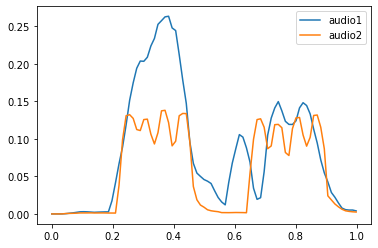

In [37]:
rms2 = librosa.feature.rms(y=audio2)
time2 = librosa.times_like(rms2, sr=sr2)
plt.plot(time1, rms1[0], label='audio1')
plt.plot(time2, rms2[0], label='audio2')
plt.legend()

## ノック77: 周波数スペクトルを表示してみよう

In [38]:
fft = np.fft.fft(audio1)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1 / sr1)
print(amp.shape)
print(amp.max())
print(amp.min())
print(freq.max())
print(freq.min())

(44100,)
479.5416865451305
2.5348641844339212e-05
22049.0
-22050.0


Text(0, 0.5, 'Amplitude')

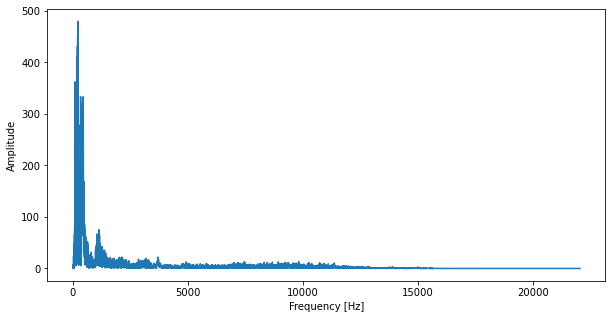

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

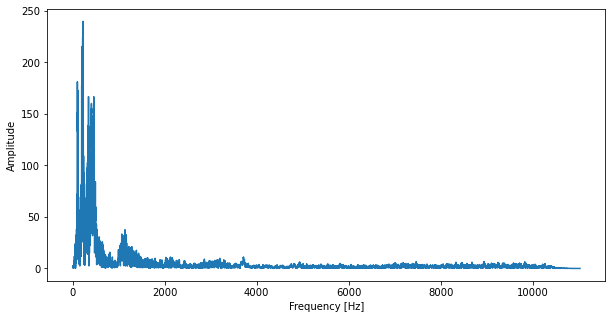

In [43]:
fft = np.fft.fft(audio1_sr22)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1 / sr1_sr22)
plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

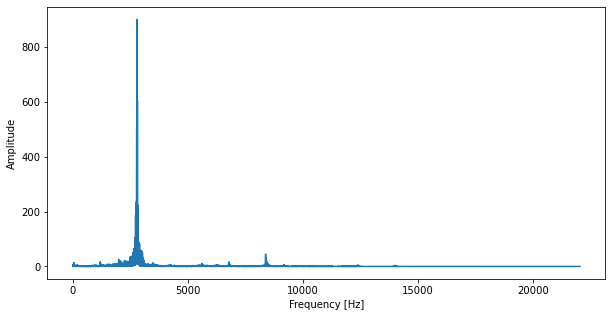

In [47]:
fft = np.fft.fft(audio2)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1/sr2)

plt.figure(figsize=(10, 5))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

## ノック78: スペクトログラムを可視化してみよう

In [49]:
stft = librosa.stft(audio1)
amps = np.abs(stft)
spectrogram = librosa.amplitude_to_db(amps)
print(stft.shape)
print(amps.shape)
print(spectrogram.shape)

(1025, 87)
(1025, 87)
(1025, 87)


Text(0, 0.5, 'db')

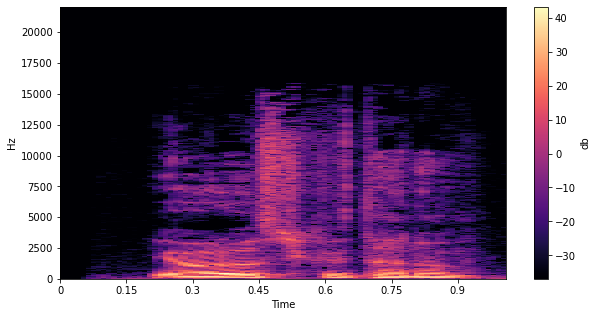

In [51]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, sr=sr1, x_axis='time', y_axis='hz', cmap='magma')
bar = plt.colorbar()
bar.ax.set_ylabel('db')

Text(0, 0.5, 'db')

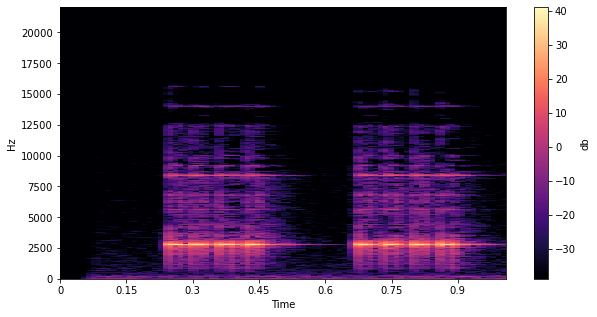

In [54]:
plt.figure(figsize=(10, 5))
stft = librosa.stft(audio2)
amps = np.abs(stft)
apectrogram = librosa.amplitude_to_db(amps)
librosa.display.specshow(spectrogram, sr=sr2, x_axis='time', y_axis='hz', cmap='magma')
bar = plt.colorbar()
bar.ax.set_ylabel('db')

## ノック79: 音の高さや長さを変えてみよう

In [55]:
audio1, sr1 = librosa.load('100knock-process-visualization/chapter-6/data/音声.mp3',sr=None)
print(audio1.shape)
disp.Audio(data=audio1, rate=sr1)

C:\Users\mikam\Anaconda3\envs\100_knocks_2\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(46080,)


In [56]:
audio1_pitch = librosa.effects.pitch_shift(audio1, sr1, 10)
print(audio1_pitch.shape)
disp.Audio(data=audio1_pitch, rate=sr1)

(46080,)


In [57]:
audio1_pitch = librosa.effects.pitch_shift(audio1, sr1, -5)
disp.Audio(data=audio1_pitch, rate=sr1)

In [58]:
audio2, sr2 = librosa.load('100knock-process-visualization/chapter-6/data/携帯電話着信音.mp3',sr=None)
print(audio2.shape)
disp.Audio(data=audio2, rate=sr2)

C:\Users\mikam\Anaconda3\envs\100_knocks_2\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(101376,)


In [59]:
audio2_time = librosa.effects.time_stretch(audio2, 0.5)
print(audio2_time.shape)
disp.Audio(data=audio2_time, rate=sr2)

(202752,)


In [60]:
audio2_time = librosa.effects.time_stretch(audio2, 2)
print(audio2_time.shape)
disp.Audio(data=audio2_time, rate=sr2)

(50688,)


## ノック80:音データを保存しよう

In [62]:
import soundfile as sf
sr = 44100
sf.write('100knock-process-visualization/chapter-6/data/audio2_time.wav', audio2_time, sr)

In [63]:
audio_read, sr_read = librosa.load('100knock-process-visualization/chapter-6/data/audio2_time.wav',sr=None)
print(audio_read.shape)
print(sr_read)
disp.Audio(data=audio_read, rate=sr_read)

(50688,)
44100
